In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVR, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset1 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2021.csv", encoding = 'unicode_escape')
dataset2 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2022.csv", encoding = 'unicode_escape')
dataset3 = pd.read_csv("/Users/harikrishna/Desktop/Assignment 2/data2020.csv", encoding = 'unicode_escape')

In [3]:
cols = dataset1.columns[0:45]
dataset1 = dataset1[cols]
dataset3 = dataset3[cols]

In [4]:
dataset1['Year'] = 2021
dataset2['Year'] = 2022
dataset3['Year'] = 2020

In [5]:
mainData = pd.concat([dataset1, dataset2, dataset3], axis = 0)
mainData = mainData.sort_values("Manufacturer", ascending= True)
mainData = mainData.reset_index(drop = True)
#mainData = mainData[:11260]

In [6]:
mainData.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (Kw),Engine Power (PS),Testing Scheme,...,Total cost / 10000 miles,Noise Level dB(A),Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Year
0,ABARTH,595,1.4 TJET 145bhp,M5,1368.0,Petrol,Internal Combustion Engine (ICE),107.0,145.0,WLTP,...,"£1,325",74.0,829.0,39.0,20.0,NaN,NaN,NaN,NaN,2021
1,ABARTH,595,595 Pista 1.4 TJET 165 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),121.0,165.0,WLTP,...,"£1,487",73.5,781.0,32.0,19.0,NaN,NaN,NaN,NaN,2020
2,ABARTH,595,595 Pista 1.4 TJET 165 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),121.0,165.0,WLTP,...,"£1,410",73.5,781.0,32.0,19.0,NaN,NaN,NaN,NaN,2020
3,ABARTH,595,595 Esseesse 1.4 TJET 180 BHP Convertible,M5,1368.0,Petrol,Internal Combustion Engine (ICE),132.0,180.0,WLTP,...,"£1,487",71.5,600.0,33.0,16.0,NaN,NaN,NaN,NaN,2020
4,ABARTH,595,595 Esseesse 1.4 TJET 180 BHP,M5,1368.0,Petrol,Internal Combustion Engine (ICE),132.0,180.0,WLTP,...,"£1,487",71.5,600.0,33.0,16.0,NaN,NaN,NaN,NaN,2020


In [7]:
mainData.shape

(16148, 46)

In [8]:
mainData.isna().sum()

Manufacturer                                 9
Model                                        9
Description                                  9
Transmission                               440
Engine Capacity                              9
Fuel Type                                    9
Powertrain                                   9
Engine Power (Kw)                          214
Engine Power (PS)                          350
Testing Scheme                               9
Euro Standard                                9
Diesel VED Supplement                        9
Electric energy consumption Miles/kWh    11800
wh/km                                    15131
Maximum range (Km)                       14290
Maximum range (Miles)                    15523
WLTP Imperial Low                           93
WLTP Imperial Medium                        92
WLTP Imperial High                          92
WLTP Imperial Extra High                    92
WLTP Imperial Combined                      88
WLTP Imperial

In [9]:
mainData.columns

Index(['Manufacturer', 'Model', 'Description', 'Transmission',
       'Engine Capacity', 'Fuel Type', 'Powertrain', 'Engine Power (Kw)',
       'Engine Power (PS)', 'Testing Scheme', 'Euro Standard',
       'Diesel VED Supplement', 'Electric energy consumption Miles/kWh',
       'wh/km', 'Maximum range (Km)', 'Maximum range (Miles)',
       'WLTP Imperial Low', 'WLTP Imperial Medium', 'WLTP Imperial High',
       'WLTP Imperial Extra High', 'WLTP Imperial Combined',
       'WLTP Imperial Combined (Weighted)', 'WLTP Metric Low',
       'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
       'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2',
       'WLTP CO2 Weighted', 'Equivalent All Electric Range Miles',
       'Equivalent All Electric Range KM', 'Electric Range City Miles',
       'Electric Range City Km', 'Annual fuel Cost 10000 Miles',
       'Annual Electricity cost / 10000 miles', 'Total cost / 10000 miles',
       'Noise Level dB(A)', 'Emis

In [10]:
mainData = mainData[['Transmission','Engine Capacity', 'Fuel Type',
                     'Powertrain','Engine Power (PS)', 'Euro Standard','Diesel VED Supplement',
                     'Electric energy consumption Miles/kWh', 'WLTP Metric Low',
                     'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                     'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2', 'Year']]

In [11]:
mainData.head()

,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Euro Standard,Diesel VED Supplement,Electric energy consumption Miles/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Year
0,M5,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,Euro 6d,False,NaN,9.5,6.1,5.8,7.0,6.8,NaN,153.0,2021
1,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,NaN,10.6,7.1,6.6,8.0,7.7,0.0,171.0,2020
2,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,NaN,9.6,6.7,6.3,7.7,7.3,0.0,165.0,2020
3,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020
4,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,NaN,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020


### DATA CLEANING AND PRE-PROCESSING

In [12]:
mainData.isna().sum()

Transmission                               440
Engine Capacity                              9
Fuel Type                                    9
Powertrain                                   9
Engine Power (PS)                          350
Euro Standard                                9
Diesel VED Supplement                        9
Electric energy consumption Miles/kWh    11800
WLTP Metric Low                             92
WLTP Metric Medium                          92
WLTP Metric High                            92
WLTP Metric Extra High                      93
WLTP Metric Combined                        98
WLTP Metric Combined (Weighted)           2754
WLTP CO2                                    20
Year                                         0
dtype: int64

In [13]:
mainData["Transmission"].unique()

array(['M5', 'SAT5', 'SA5', 'M6', 'A8', 'A6', 'SA6', 'A7', 'M7', 'A9-AWD',
       '8AT', 'A9', 'DCT7', 'DCT6', 'SAT6', nan, 'CVT', 'SA7', 'SA8',
       'A5', 'A1', '10 Speed Automatic', 'A8-AWD', '7DCT', 'A6-AWD',
       'M6-AWD', 'MPS6', 'MPS6-AWD', '8-speed', '6MT', '5MT', 'DCT8',
       '6AT', 'MT5', 'AMT5', '4AT', 'MT6', '6-speed auto DCT', 'A4',
       'AT6', 'AT1', 'E-CVT', 'A10', 'Auto', '7SP. SSG', 'AT', '8A AWD',
       'Manual', 'Automatic', '8A-AWD', '7A-FWD'], dtype=object)

In [14]:
mainData = mainData[mainData['Transmission'].notna()]

In [15]:
mainData.isna().sum()

Transmission                                 0
Engine Capacity                              0
Fuel Type                                    0
Powertrain                                   0
Engine Power (PS)                          173
Euro Standard                                0
Diesel VED Supplement                        0
Electric energy consumption Miles/kWh    11791
WLTP Metric Low                             10
WLTP Metric Medium                          10
WLTP Metric High                            10
WLTP Metric Extra High                      10
WLTP Metric Combined                         6
WLTP Metric Combined (Weighted)           2597
WLTP CO2                                    10
Year                                         0
dtype: int64

In [16]:
mainData = mainData[mainData['Engine Power (PS)'].notna()]

#### Electric energy consumption Miles/kWh

IC engine value in all other rows is 0.

In [17]:
mainData.isna().sum()

Transmission                                 0
Engine Capacity                              0
Fuel Type                                    0
Powertrain                                   0
Engine Power (PS)                            0
Euro Standard                                0
Diesel VED Supplement                        0
Electric energy consumption Miles/kWh    11622
WLTP Metric Low                             10
WLTP Metric Medium                          10
WLTP Metric High                            10
WLTP Metric Extra High                      10
WLTP Metric Combined                         6
WLTP Metric Combined (Weighted)           2462
WLTP CO2                                    10
Year                                         0
dtype: int64

In [18]:
mainData['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Hybrid Electric Vehicle (HEV)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
       'Micro-hybrid'], dtype=object)

In [19]:
# IC engine

In [20]:
mainData.loc[mainData['Powertrain'] == 'Internal Combustion Engine (ICE)', 'Electric energy consumption Miles/kWh'] = 0

In [21]:
# Plug in hybrid vehicle

In [22]:
phev_consumption_mean = np.mean(mainData.loc[mainData['Powertrain']== 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric energy consumption Miles/kWh'])

In [23]:
phev_consumption_mean

3.895571955719557

In [24]:
np.median(mainData.loc[mainData['Powertrain']== 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric energy consumption Miles/kWh'])

nan

In [25]:
phev_consumption = mainData.loc[mainData['Powertrain']== 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric energy consumption Miles/kWh']

In [26]:
phev_consumption_list = phev_consumption.to_list()

(array([ 94., 133.,  27.,   3.,   3.,   6.,   3.,   0.,   0.,   2.]),
 array([ 1.6 ,  3.24,  4.88,  6.52,  8.16,  9.8 , 11.44, 13.08, 14.72,
        16.36, 18.  ]),
 <BarContainer object of 10 artists>)

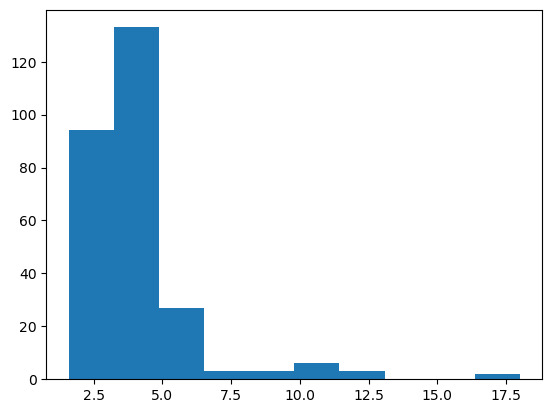

In [27]:
plt.hist(x = phev_consumption)

In [28]:
np.median(phev_consumption.dropna())

3.6

In [29]:
mainData.loc[mainData['Powertrain'] == 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric energy consumption Miles/kWh'] = 3.6

In [30]:
# Battery Electric vehicle

In [31]:
bev_consumption = mainData.loc[mainData['Powertrain'] == 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
            'Electric energy consumption Miles/kWh']

In [32]:
bev_consumption.isna().sum()

0

In [33]:
# Hybrid Electric Vehicle

In [34]:
hev_consumption = mainData.loc[mainData['Powertrain'] == 'Hybrid Electric Vehicle (HEV)', 'Electric energy consumption Miles/kWh']

In [35]:
hev_consumption.isna().sum()

2195

In [36]:
hev_consumption.unique()

array([nan,  0.])

In [37]:
mainData.loc[mainData['Powertrain'] == 'Hybrid Electric Vehicle (HEV)', 'Electric energy consumption Miles/kWh'] = 0

In [38]:
# Mild Hybrid Electric Vehicle

In [39]:
mhev_consumption = mainData.loc[mainData['Powertrain'] == 'Mild Hybrid Electric Vehicle (MHEV)']['Electric energy consumption Miles/kWh']

In [40]:
mhev_consumption.unique()

array([nan,  0.])

In [41]:
mainData.loc[mainData['Powertrain'] == 'Mild Hybrid Electric Vehicle (MHEV)', 'Electric energy consumption Miles/kWh'] = 0

In [42]:
# Micro Hybrid

In [43]:
microHybrid_consumption = mainData.loc[mainData['Powertrain'] == 'Micro-hybrid']['Electric energy consumption Miles/kWh']

In [44]:
microHybrid_consumption.unique()

array([nan])

In [45]:
mainData = mainData[mainData['Electric energy consumption Miles/kWh'].notna()]

In [46]:
# changing the Miles value to KM value

In [47]:
mainData['Electric energy consumption Miles/kWh'] = mainData['Electric energy consumption Miles/kWh'] * 1.60

In [48]:
# change column name

mainData.rename(columns={'Electric energy consumption Miles/kWh': 'Electric energy consumption Km/kWh'}, inplace=True)

In [49]:
mainData.isna().sum()

Transmission                             0
Engine Capacity                          0
Fuel Type                                0
Powertrain                               0
Engine Power (PS)                        0
Euro Standard                            0
Diesel VED Supplement                    0
Electric energy consumption Km/kWh       0
WLTP Metric Low                         10
WLTP Metric Medium                      10
WLTP Metric High                        10
WLTP Metric Extra High                  10
WLTP Metric Combined                     6
WLTP Metric Combined (Weighted)       2450
WLTP CO2                                10
Year                                     0
dtype: int64

#### Metric Combined Weighted

In [50]:
# Internal combustion engine

In [51]:
mainData.loc[mainData['Powertrain'] == 'Internal Combustion Engine (ICE)', 'WLTP Metric Combined (Weighted)'] = 0

In [52]:
WLTP_metric_cols = ['WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High']

for each in WLTP_metric_cols:
    mainData = mainData[mainData[each].notna()]

In [53]:
mainData = mainData[mainData['WLTP Metric Combined (Weighted)'].notna()]

In [54]:
mainData = mainData[mainData['WLTP CO2'].notna()]

In [55]:
mainData.isna().sum()

Transmission                          0
Engine Capacity                       0
Fuel Type                             0
Powertrain                            0
Engine Power (PS)                     0
Euro Standard                         0
Diesel VED Supplement                 0
Electric energy consumption Km/kWh    0
WLTP Metric Low                       0
WLTP Metric Medium                    0
WLTP Metric High                      0
WLTP Metric Extra High                0
WLTP Metric Combined                  0
WLTP Metric Combined (Weighted)       0
WLTP CO2                              0
Year                                  0
dtype: int64

In [56]:
# change year to actual format

mainData['Year'] = pd.to_datetime(mainData['Year'], format='%Y').dt.year

In [57]:
mainData = mainData.reset_index(drop = True)

In [58]:
mainData.head()

,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Euro Standard,Diesel VED Supplement,Electric energy consumption Km/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Year
0,M5,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,Euro 6d,False,0.0,9.5,6.1,5.8,7.0,6.8,0.0,153.0,2021
1,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,0.0,10.6,7.1,6.6,8.0,7.7,0.0,171.0,2020
2,M5,1368.0,Petrol,Internal Combustion Engine (ICE),165.0,Euro 6d-TEMP,False,0.0,9.6,6.7,6.3,7.7,7.3,0.0,165.0,2020
3,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020
4,M5,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,Euro 6d-TEMP,False,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,2020


#### Taking Unique Values of Categorical variables

In [59]:
mainData['Transmission'].unique()

array(['M5', 'SAT5', 'SA5', 'M6', 'A8', 'A6', 'SA6', 'A7', 'M7', 'A9-AWD',
       '8AT', 'A9', 'DCT6', 'SAT6', 'CVT', 'SA7', 'SA8', 'A5', 'DCT7',
       'A1', '10 Speed Automatic', 'A8-AWD', '7DCT', 'A6-AWD', 'M6-AWD',
       'MPS6', 'MPS6-AWD', '8-speed', '6MT', '5MT', 'DCT8', '6AT', 'MT5',
       'AMT5', '4AT', 'MT6', '6-speed auto DCT', 'A4', 'AT6', 'AT1',
       'E-CVT', 'A10', 'Auto', '7SP. SSG', 'AT', '8A AWD', 'Manual',
       'Automatic', '8A-AWD', '7A-FWD'], dtype=object)

In [60]:
mainData['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'Electricity / Petrol', 'Petrol / LPG',
       'Petrol Electric', 'Diesel Electric', 'Electricity',
       'Electricity / Diesel'], dtype=object)

In [61]:
mainData['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Hybrid Electric Vehicle (HEV)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'],
      dtype=object)

In [62]:
mainData['Euro Standard'].unique()

array(['Euro 6d', 'Euro 6d-TEMP', 'Euro 6c',
       'Euro 6-WLTP (for BEVs only)'], dtype=object)

In [63]:
mainData['Diesel VED Supplement'].unique()

array([False, True], dtype=object)

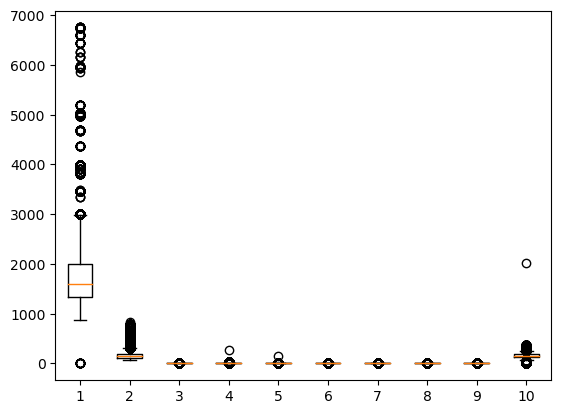

In [64]:


num_cols = ['Engine Capacity', 'Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2']

plt.boxplot(mainData[num_cols])
plt.show()

In [65]:
mainData = mainData[mainData['WLTP CO2'] != 2019]

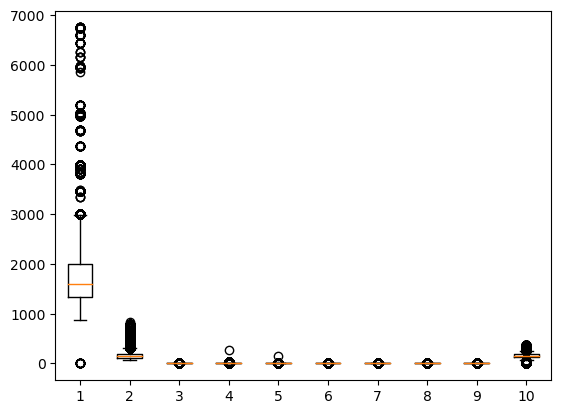

In [66]:
plt.boxplot(mainData[num_cols])
plt.show()

#### Check the Variance of numerical variables

In [67]:
mainData.var()

Engine Capacity                       695711.176588
Engine Power (PS)                      11753.458178
Diesel VED Supplement                      0.178813
Electric energy consumption Km/kWh         0.832623
WLTP Metric Low                           19.961424
WLTP Metric Medium                         6.696604
WLTP Metric High                           3.242815
WLTP Metric Extra High                     3.690507
WLTP Metric Combined                       4.565066
WLTP Metric Combined (Weighted)            0.167175
WLTP CO2                                2481.617555
Year                                       0.583713
dtype: float64

### Creating Dummy Variables

In [68]:
mainData_dummies = pd.get_dummies(mainData, columns=['Engine Capacity','Transmission', 'Fuel Type', 'Powertrain', 'Euro Standard',
       'Diesel VED Supplement', 'Year'], drop_first= True)

In [69]:
# X_test_dummies = pd.get_dummies(X_test_new, columns = ['Transmission', 'Fuel Type', 'Powertrain', 'Euro Standard',
#       'Diesel VED Supplement', 'Year'], drop_first = True)

In [70]:
mainData_dummies.head()

,Engine Power (PS),Electric energy consumption Km/kWh,WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,Engine Capacity_875.0,...,Powertrain_Hybrid Electric Vehicle (HEV),Powertrain_Internal Combustion Engine (ICE),Powertrain_Mild Hybrid Electric Vehicle (MHEV),Powertrain_Plug-in Hybrid Electric Vehicle (PHEV),Euro Standard_Euro 6c,Euro Standard_Euro 6d,Euro Standard_Euro 6d-TEMP,Diesel VED Supplement_True,Year_2021,Year_2022
0,145.0,0.0,9.5,6.1,5.8,7.0,6.8,0.0,153.0,0,...,0,1,0,0,0,1,0,0,1,0
1,165.0,0.0,10.6,7.1,6.6,8.0,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0
2,165.0,0.0,9.6,6.7,6.3,7.7,7.3,0.0,165.0,0,...,0,1,0,0,0,0,1,0,0,0
3,180.0,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0
4,180.0,0.0,10.8,7.1,6.4,8.1,7.7,0.0,171.0,0,...,0,1,0,0,0,0,1,0,0,0


### Train test split

In [71]:
X = mainData_dummies.drop(columns = ['WLTP CO2'])
y = mainData_dummies['WLTP CO2']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [73]:
train_numerical = X_train[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)']]

test_numerical = X_test[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)']]

In [74]:
train_categorical = X_train.drop(columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])
test_categorical = X_test.drop(columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])

### Standardise dataset

In [75]:
train_numerical = train_numerical.reset_index(drop = True)
train_categorical = train_categorical.reset_index(drop = True)
test_numerical = test_numerical.reset_index(drop = True)
test_categorical = test_categorical.reset_index(drop = True)

In [76]:
scaler = StandardScaler()

# fit transform
train_scaled = scaler.fit_transform(train_numerical)
test_scaled = scaler.transform(test_numerical)

In [77]:
train_labelled = pd.DataFrame(train_scaled, columns = ['Engine Power (PS)','Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])
test_labelled = pd.DataFrame(test_scaled, columns = ['Engine Power (PS)', 'Electric energy consumption Km/kWh',
                           'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
                          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)'])

In [78]:
X_train_new = pd.concat([train_labelled, train_categorical], axis = 1)

In [79]:
X_test_new = pd.concat([test_labelled, test_categorical], axis = 1)

## SVM

In [439]:
svc_threshold = np.median(mainData['WLTP CO2'])

In [440]:
y_train_class = []
y_test_class = []

for each in y_train:
    if each > svc_threshold:
        y_train_class.append("High")
    else:
        y_train_class.append("Low")

for each in y_test:
    if each > svc_threshold:
        y_test_class.append("High")
    else:
        y_test_class.append("Low")

In [286]:
SVC_model_tuning = SVC()

In [292]:
param_grid_SVC = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [293]:
grid_search_SVC = GridSearchCV(SVC_model_tuning, param_grid = param_grid_SVC, cv = 5)

In [297]:
grid_search_SVC.fit(X_train_new, y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [299]:
best_params_SVC = grid_search_SVC.best_params_
best_params_SVC

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [300]:
poly_SVC_model = SVC(C = 1, gamma = 1, kernel = 'poly')

In [301]:
poly_SVC_model.fit(X_train_new, y_train_class)

SVC(C=1, gamma=1, kernel='poly')

In [302]:
y_pred_train = poly_SVC_model.predict(X_train_new)

In [303]:
confusion_matrix(y_train_class, y_pred_train)

array([[4846,   23],
       [  20, 5144]])

In [353]:
accuracy_SVC_train_1 = accuracy_score(y_train_class, y_pred_train)*100
accuracy_SVC_train_1

99.57141433270208

In [305]:
y_pred_test = poly_SVC_model.predict(X_test_new)

In [355]:
accuracy_SVC_test_1 = accuracy_score(y_test_class, y_pred_test)*100
accuracy_SVC_test_1

96.83720930232558

#### Without  dummy 

In [307]:
SVC_model_tuning_2 = SVC()

In [308]:
param_grid_SVC_2 = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [309]:
grid_search_SVC_2 = GridSearchCV(SVC_model_tuning_2, param_grid = param_grid_SVC_2, cv = 5)

In [310]:
grid_search_SVC_2.fit(train_labelled, y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [312]:
best_params_SVC_2 = grid_search_SVC_2.best_params_
best_params_SVC_2

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [313]:
poly_SVC_model_2 = SVC(C = 100, gamma = 1, kernel = 'rbf')

In [316]:
poly_SVC_model_2.fit(train_labelled, y_train_class)

SVC(C=100, gamma=1)

In [317]:
y_pred_train_2 = poly_SVC_model_2.predict(train_labelled)

In [318]:
confusion_matrix(y_train_class, y_pred_train_2)

array([[4687,  182],
       [ 109, 5055]])

In [356]:
accuracy_SVC_train_2 = accuracy_score(y_train_class, y_pred_train_2)*100
accuracy_SVC_train_2

97.0995714143327

In [322]:
y_pred_test_2 = poly_SVC_model_2.predict(test_labelled)

In [357]:
accuracy_SVC_test_2 = accuracy_score(y_test_class, y_pred_test_2)*100
accuracy_SVC_test_2

96.83720930232558

#### One feature

In [324]:
SVC_model_tuning_3 = SVC()

In [325]:
param_grid_SVC_3 = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [326]:
grid_search_SVC_3 = GridSearchCV(SVC_model_tuning_3, param_grid = param_grid_SVC_3, cv = 5)

In [327]:
grid_search_SVC_3.fit(X_train_new[["WLTP Metric High"]], y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [328]:
best_params_SVC_3 = grid_search_SVC_3.best_params_
best_params_SVC_3

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [330]:
poly_SVC_model_3 = SVC(C = 0.1, gamma = 0.001, kernel = 'linear')

In [331]:
poly_SVC_model_3.fit(X_train_new[["WLTP Metric High"]], y_train_class)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [332]:
y_pred_train_3 = poly_SVC_model_3.predict(X_train_new[["WLTP Metric High"]])

In [333]:
confusion_matrix(y_train_class, y_pred_train_3)

array([[4240,  629],
       [ 349, 4815]])

In [359]:
accuracy_SVC_train_3 = accuracy_score(y_train_class, y_pred_train_3)*100
accuracy_SVC_train_3

90.25216784610784

In [336]:
y_pred_test_3 = poly_SVC_model_3.predict(X_test_new[["WLTP Metric High"]])

In [360]:
accuracy_SVC_test_3 = accuracy_score(y_test_class, y_pred_test_3)*100
accuracy_SVC_test_3

90.34883720930232

In [ ]:
# Two features

In [339]:
SVC_model_tuning_4 = SVC()

In [340]:
param_grid_SVC_4 = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}

In [341]:
grid_search_SVC_4 = GridSearchCV(SVC_model_tuning_4, param_grid = param_grid_SVC_4, cv = 5)

In [342]:
grid_search_SVC_4.fit(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']], y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [343]:
best_params_SVC_4 = grid_search_SVC_4.best_params_
best_params_SVC_4

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [344]:
poly_SVC_model_4 = SVC(C = 100, gamma = 1, kernel = 'rbf')

In [345]:
poly_SVC_model_4.fit(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']], y_train_class)

SVC(C=100, gamma=1)

In [346]:
y_pred_train_4 = poly_SVC_model_4.predict(X_train_new[['WLTP Metric High', 'WLTP Metric Combined']])

In [347]:
confusion_matrix(y_train_class, y_pred_train_4)

array([[4262,  607],
       [ 226, 4938]])

In [361]:
accuracy_SVC_train_4 = accuracy_score(y_train_class, y_pred_train_4)*100
accuracy_SVC_train_4

91.69739858467058

In [349]:
y_pred_test_4 = poly_SVC_model_4.predict(X_test_new[['WLTP Metric High', 'WLTP Metric Combined']])

In [362]:
accuracy_SVC_test_4 = accuracy_score(y_test_class, y_pred_test_4)*100
accuracy_SVC_test_4

91.90697674418604

#### PLot

In [363]:
test_SVC_accuracies = [accuracy_SVC_test_1, accuracy_SVC_test_2, accuracy_SVC_test_3, accuracy_SVC_test_4]
features = ["All features", "Without Dummy", 1, 2]

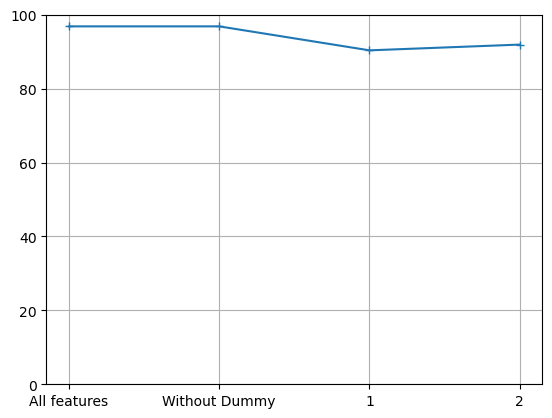

In [373]:
max_val = max(test_SVC_accuracies)
max_index = test_SVC_accuracies.index(max_val)

plt.plot(features, test_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

In [375]:
train_SVC_accuracies = [accuracy_SVC_train_1, accuracy_SVC_train_2, accuracy_SVC_train_3, accuracy_SVC_train_4]
features = ["All features", "Without Dummy", 1, 2]

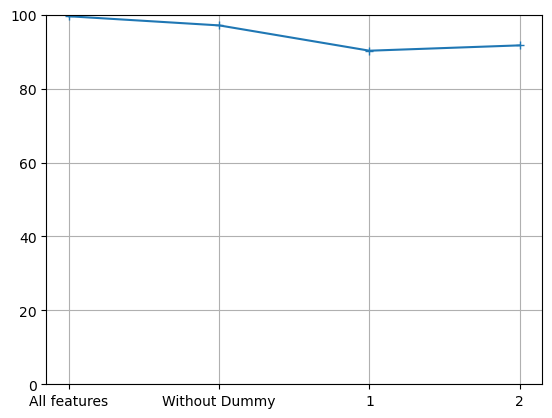

In [376]:
max_val = max(train_SVC_accuracies)
max_index = train_SVC_accuracies.index(max_val)

plt.plot(features, train_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

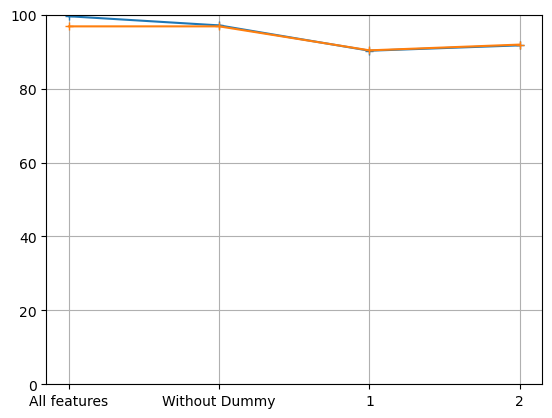

In [377]:
plt.plot(features, train_SVC_accuracies, "-+")
plt.plot(features, test_SVC_accuracies, "-+")
plt.grid(True)
plt.ylim(0,100)
plt.show()

### Neural Network

In [426]:
n_samples, n_features = train_labelled.shape

In [441]:
y_train_binary = []
y_test_binary = []

for each in y_train:
    if each > svc_threshold:
        y_train_binary.append(1)
    else:
        y_train_binary.append(0)

for each in y_test:
    if each > svc_threshold:
        y_test_binary.append(1)
    else:
        y_test_binary.append(0)

In [442]:
import torch
import torch.nn as nn

In [456]:
X_train_neural = train_labelled.to_numpy(dtype = 'float32')
X_test_neural = test_labelled.to_numpy(dtype = 'float32')

In [457]:
X_train_neural = torch.from_numpy(X_train_neural)
X_test_neural = torch.from_numpy(X_test_neural)

In [458]:
y_train_class_arr = np.array(y_train_binary)
y_test_class_arr = np.array(y_test_binary)

In [459]:
y_train_neural = torch.from_numpy(y_train_class_arr.astype(np.float32))
y_test_neural = torch.from_numpy(y_test_class_arr.astype(np.float32))

In [460]:
y_train_neural = y_train_neural.view(y_train_neural.shape[0], 1)
y_test_neural = y_test_neural.view(y_test_neural.shape[0], 1)

In [461]:
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [462]:
model = LogisticRegression(n_features)

In [463]:
# Loss and optimizer

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [464]:
# training loop

num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train_neural)
    loss = criterion(y_predicted, y_train_neural)
    
    #Backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')

epoch:10, loss = 0.9374
epoch:20, loss = 0.8487
epoch:30, loss = 0.7752
epoch:40, loss = 0.7159
epoch:50, loss = 0.6685
epoch:60, loss = 0.6306
epoch:70, loss = 0.5998
epoch:80, loss = 0.5743
epoch:90, loss = 0.5528
epoch:100, loss = 0.5344


In [465]:
with torch.no_grad():
    y_predicted = model(X_test_neural)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test_neural).sum() / float(y_test_neural.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.8802


torch.Size([10033, 1])

## Naive Bayes

#### With Dummy Variables

In [ ]:
# create bins to classify the target variable into classes

bins = [-1, 100, 170, int(np.max(mainData['WLTP CO2']))]
labels = ['Low', 'Moderate', 'High']

In [123]:
y_train_multi = pd.cut(y_train, bins = bins, labels = labels)
y_test_multi = pd.cut(y_test, bins = bins, labels = labels)

In [124]:
naive_model = GaussianNB()

In [125]:
naive_model.fit(X_train_new, y_train_multi)

GaussianNB()

In [198]:
y_pred_1_train = naive_model.predict(X_train_new)

In [199]:
accuracy_1_train = accuracy_score(y_train_multi, y_pred_1_train)*100
accuracy_1_train

70.16844413435662

In [200]:
y_pred_1_test = naive_model.predict(X_test_new)

In [201]:
accuracy_1_test = accuracy_score(y_test_multi, y_pred_1_test)*100
accuracy_1_test

69.46511627906978

In [202]:
confusion_matrix(y_test_multi, y_pred_naive)

array([[ 645,  293,  513],
       [   2,  119,    0],
       [  33,  472, 2223]])

#### Without dummy variables

In [140]:
X_train_naive = train_labelled
X_test_naive = test_labelled

In [151]:
tempData = mainData[['Engine Power (PS)', 'Electric energy consumption Km/kWh',
          'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
          'WLTP Metric Combined', 'WLTP Metric Combined (Weighted)', 'WLTP CO2']]

<Axes: >

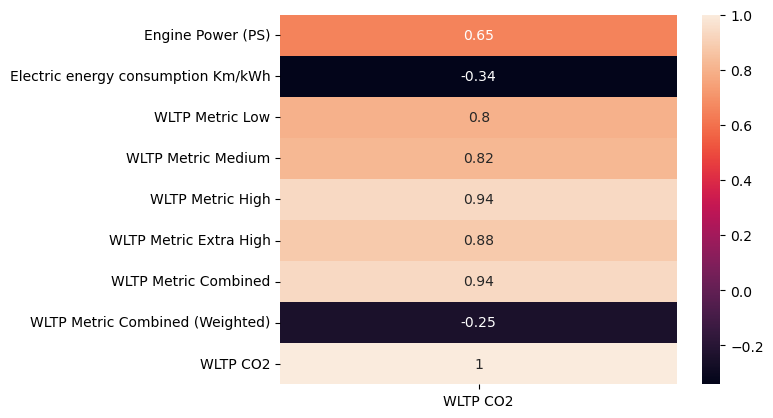

In [154]:
corr_matrix = tempData.corr()
sns.heatmap(corr_matrix[['WLTP CO2']], annot = True)

In [141]:
naive_model_2 = GaussianNB()

In [216]:
naive_model_2.fit(X_train_naive, y_train_multi)

GaussianNB()

In [217]:
y_pred_2_train = naive_model_2.predict(train_labelled)

In [218]:
accuracy_2_train = accuracy_score(y_train_multi, y_pred_2_train)*100
accuracy_2_train

89.80364796172631

In [219]:
y_pred_2_test = naive_model_2.predict(test_labelled)

In [220]:
accuracy_2_test =  accuracy_score(y_test_multi, y_pred_2_test)*100
accuracy_2_test

88.76744186046511

#### With only highest correlated feature

In [221]:
naive_model_3 = GaussianNB()

In [222]:
naive_model_3.fit(X_train_naive[['WLTP Metric High']], y_train_multi)

GaussianNB()

In [223]:
y_pred_3_train = naive_model_3.predict(X_train_naive[['WLTP Metric High']])

In [224]:
accuracy_3_train = accuracy_score(y_train_multi, y_pred_3_train)*100
accuracy_3_train

90.02292434964617

In [225]:
y_pred_3_test = naive_model_3.predict(X_test_naive[['WLTP Metric High']])

In [226]:
accuracy_3_test = accuracy_score(y_test_multi, y_pred_3_test)*100
accuracy_3_test

88.9767441860465

#### 2 features

In [227]:
naive_model_4 = GaussianNB()

In [228]:
naive_model_4.fit(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined']], y_train_multi)

GaussianNB()

In [229]:
y_pred_4_train = naive_model_4.predict(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined']])

In [230]:
accuracy_4_train = accuracy_score(y_train_multi, y_pred_4_train)*100
accuracy_4_train

89.90331904714442

In [231]:
y_pred_4_test = naive_model_4.predict(X_test_naive[['WLTP Metric High', 'WLTP Metric Combined']])

In [232]:
accuracy_4_test = accuracy_score(y_test_multi, y_pred_4_test)*100
accuracy_4_test

88.90697674418605

#### Three features

In [233]:
naive_model_5 = GaussianNB()

In [234]:
naive_model_5.fit(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']], y_train_multi)

GaussianNB()

In [235]:
y_pred_5_train = naive_model_5.predict(X_train_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']])

In [236]:
accuracy_5_train = accuracy_score(y_train_multi, y_pred_5_train)*100
accuracy_5_train

89.04614771254859

In [237]:
y_pred_5_test = naive_model_5.predict(X_test_naive[['WLTP Metric High', 'WLTP Metric Combined', 'WLTP Metric Extra High']])

In [238]:
accuracy_5_test = accuracy_score(y_test_multi, y_pred_5_test)*100
accuracy_5_test

88.32558139534883

#### plots

In [239]:
# plot of number of features vs test accuracy

test_naive_accuracies = [accuracy_1_test, accuracy_2_test, accuracy_3_test, accuracy_4_test, accuracy_5_test]
features = ["All features", "Without Dummy", 1, 2, 3]

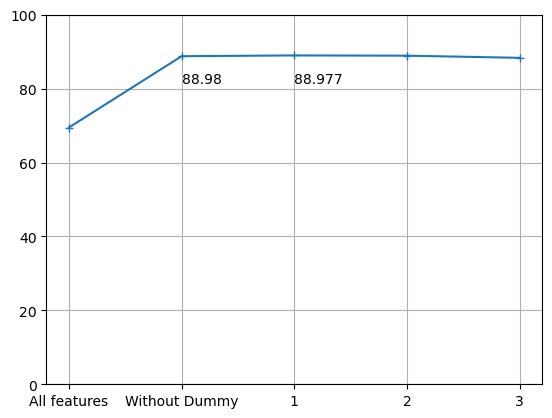

In [277]:
max_val = max(test_naive_accuracies)
max_index = test_naive_accuracies.index(max_val)

plt.plot(features, test_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(test_naive_accuracies[2], 3), (features[3], test_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.show()

In [259]:
# plot of number of features vs train accuracy

train_naive_accuracies = [accuracy_1_train, accuracy_2_train, accuracy_3_train, accuracy_4_train, accuracy_5_train]
features = ["All features", "Without Dummy", 1, 2, 3]

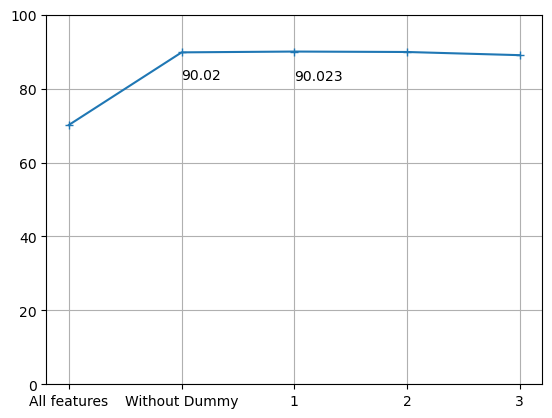

In [278]:
max_val = max(train_naive_accuracies)
max_index = train_naive_accuracies.index(max_val)

plt.plot(features, train_naive_accuracies, "-+")
plt.annotate(round(max_val, 2), (features[max_index], max_val), textcoords="offset points", xytext=(0, -20), ha='left')
plt.annotate(round(train_naive_accuracies[2], 3), (features[3], train_naive_accuracies[3]), textcoords="offset points", xytext=(0, -20), ha='left')
plt.grid(True)
plt.ylim(0,100)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
test_naive_accuracies = [accuracy_1_test, accuracy_2_test, accuracy_3_test, accuracy_4_test, accuracy_5_test]
train_naive_accuracies = [accuracy_1_train, accuracy_2_train, accuracy_3_train, accuracy_4_train, accuracy_5_train]
features = ["All features", "Without Dummy", 1, 2, 3]

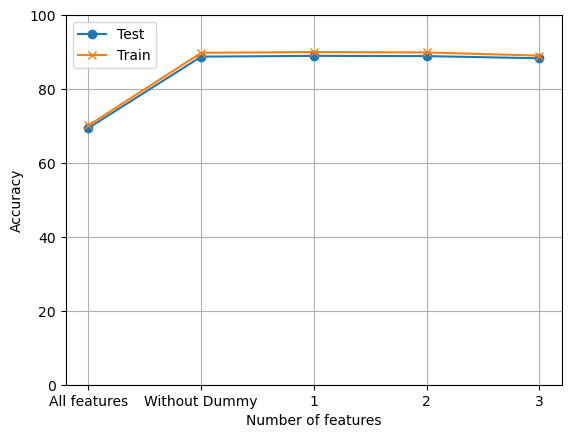

In [285]:
plt.plot(features, test_naive_accuracies, "-o")
plt.plot(features, train_naive_accuracies, "-x")
plt.grid(True)
plt.legend(["Test", "Train"])
plt.ylim(0,100)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()